# **Lab 6: Multi-Dimensional Scaling (MDS)**:

**Created by: Preksha Shah | 2348446**

**Date: 27.03.2024**


In [15]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances

In [3]:
#Load the dataset
data = pd.read_csv("/content/Stress-Lysis.csv")

**Basic EDA:**

In [4]:
#Display basic information about the dataset
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step_count    2001 non-null   int64  
 3   Stress_Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB
None


In [5]:
#Display summary statistics of numerical features
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
          Humidity  Temperature   Step_count  Stress_Level
count  2001.000000  2001.000000  2001.000000   2001.000000
mean     20.000000    89.000000   100.141429      1.104448
std       5.777833     5.777833    58.182948      0.771094
min      10.000000    79.000000     0.000000      0.000000
25%      15.000000    84.000000    50.000000      0.000000
50%      20.000000    89.000000   101.000000      1.000000
75%      25.000000    94.000000   150.000000      2.000000
max      30.000000    99.000000   200.000000      2.000000


### **Visualize Distributions of Numerical Features**

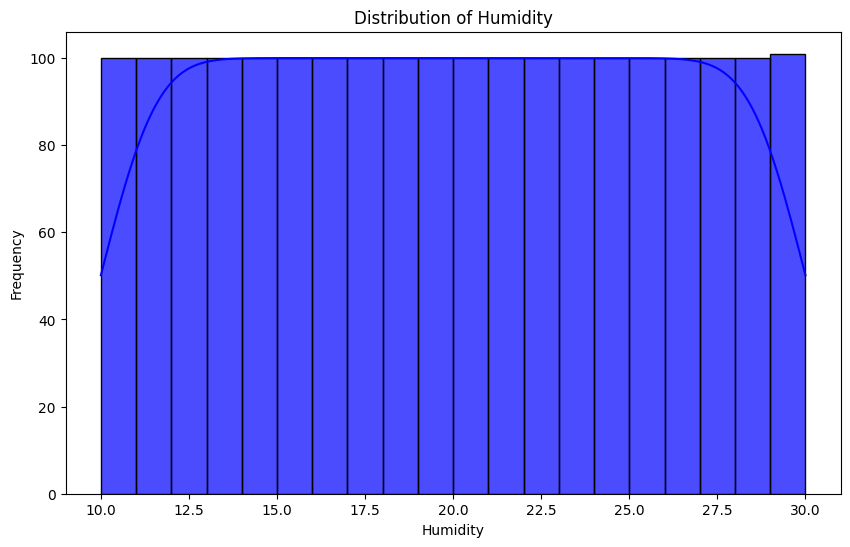

In [6]:
#Visualize distributions of Humidity
plt.figure(figsize=(10, 6))
sns.histplot(data['Humidity'], bins=20, kde=True, color='blue', alpha=0.7)
plt.title('Distribution of Humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()

**Inference:**
1. The data is evenly distributed or discretized into bins of equal width.
2. It suggests a uniform distribution of data points across the range of values.
3. Each bin contains the same number of observations.
4. It may represent discrete data or a transformation of the original data.
5. It simplifies visualization and interpretation of the data distribution.

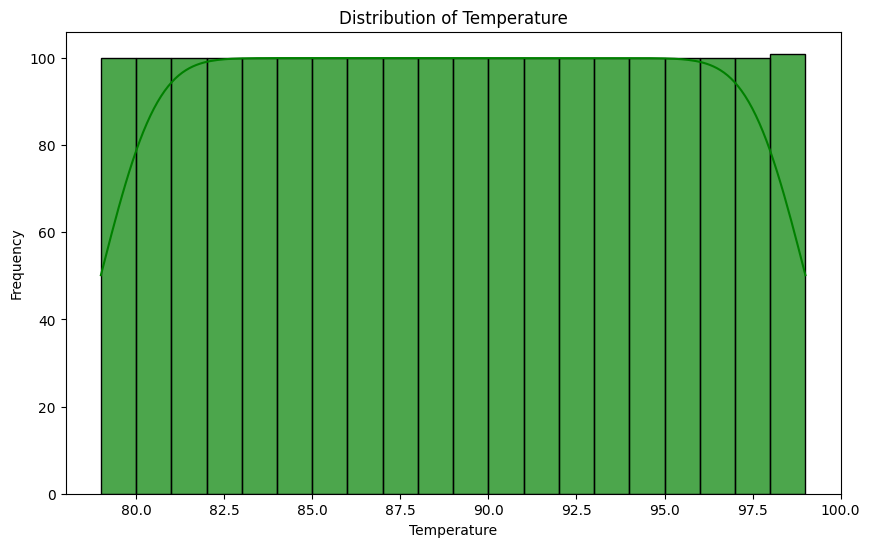

In [7]:
#Visualize distributions of Temperature
plt.figure(figsize=(10, 6))
sns.histplot(data['Temperature'], bins=20, kde=True, color='green', alpha=0.7)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Inference:**
1. The data is evenly distributed or discretized into bins of equal width.
2. It suggests a uniform distribution of data points across the range of values.
3. Each bin contains the same number of observations.
4. It may represent discrete data or a transformation of the original data.
5. It simplifies visualization and interpretation of the data distribution.

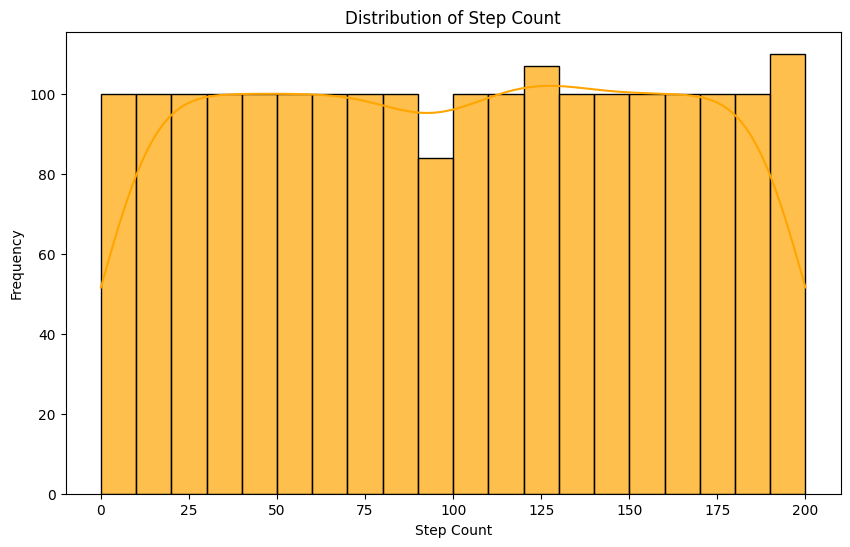

In [9]:
#Visualize distributions of Step Count
plt.figure(figsize=(10, 6))
sns.histplot(data['Step_count'], bins=20, kde=True, color='orange', alpha=0.7)
plt.title('Distribution of Step Count')
plt.xlabel('Step Count')
plt.ylabel('Frequency')
plt.show()

**Inference:**
The data is evenly distributed or discretized into bins of equal width majorly.

### **Visualize Relationship between Features and Stress Levels**

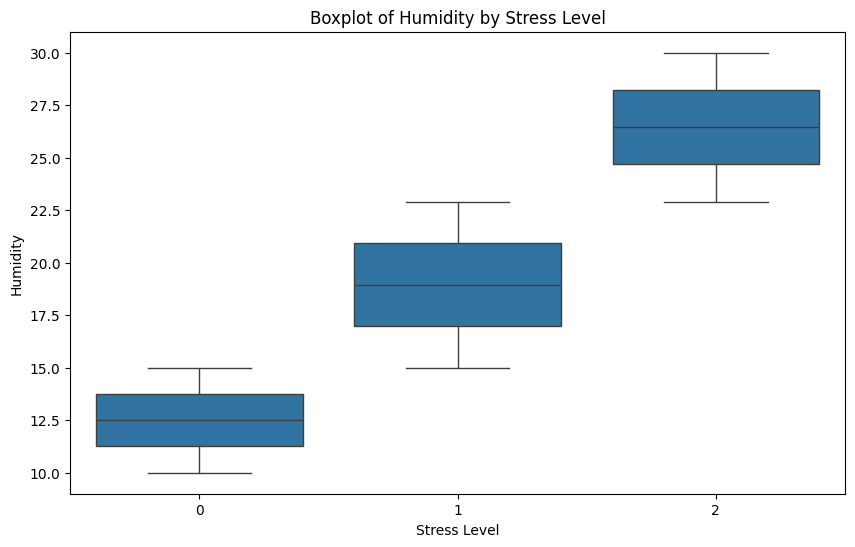

In [13]:
#Boxplot of Humidity by Stress Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stress_Level', y='Humidity', data=data)
plt.title('Boxplot of Humidity by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Humidity')
plt.show()

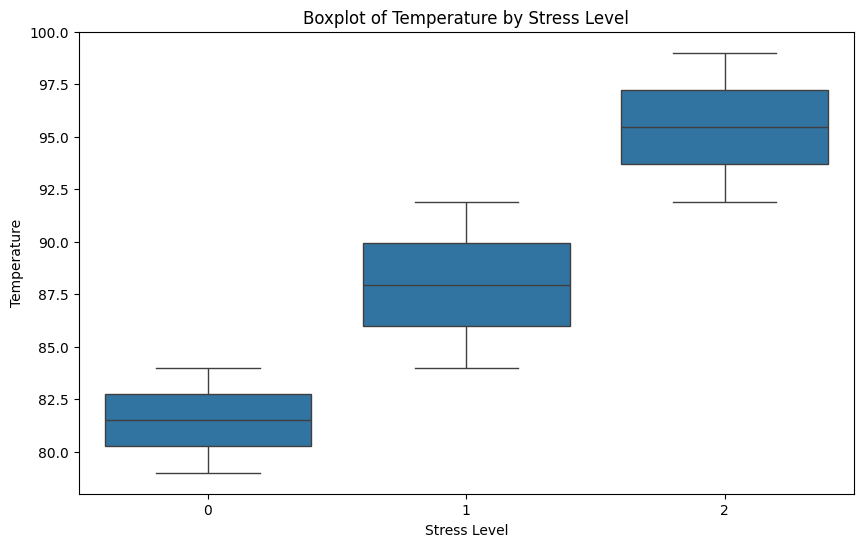

In [11]:
#Boxplot of Temperature by Stress Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stress_Level', y='Temperature', data=data)
plt.title('Boxplot of Temperature by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Temperature')
plt.show()

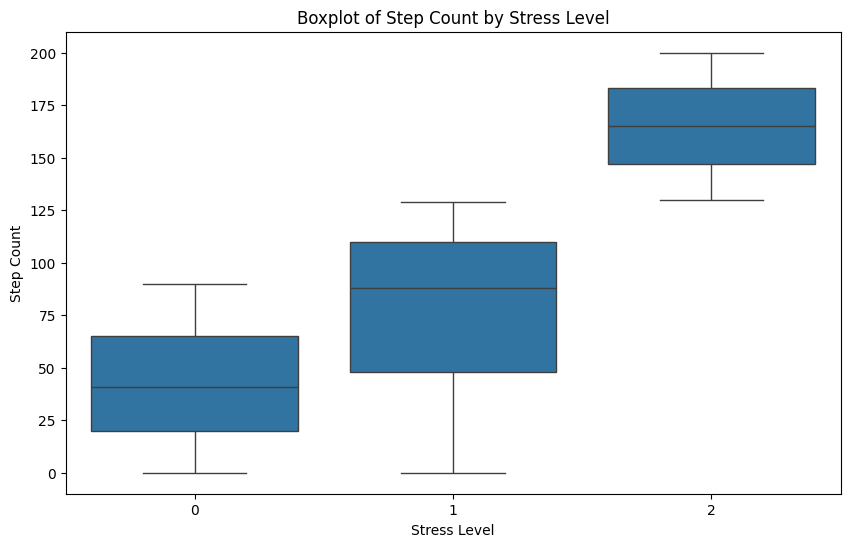

In [12]:
#Boxplot of Step Count by Stress Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stress_Level', y='Step_count', data=data)
plt.title('Boxplot of Step Count by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Step Count')
plt.show()

In [18]:
# Extract features and labels
features = data[['Humidity', 'Temperature', 'Step_count']]
labels = data['Stress_Level']

# Print the extracted features and labels
print("Extracted Features:")
print(features.head())
print("\nLabels:")
print(labels.head())

Extracted Features:
   Humidity  Temperature  Step_count
0     21.33        90.33         123
1     21.41        90.41          93
2     27.12        96.12         196
3     27.64        96.64         177
4     10.87        79.87          87

Labels:
0    1
1    1
2    2
3    2
4    0
Name: Stress_Level, dtype: int64


The extracted features and labels from the dataset are as follows:

**Extracted Features:**
- **Humidity**: Represents the humidity level measured in percentage.
- **Temperature**: Denotes the temperature measured in degrees Fahrenheit.
- **Step_count**: Indicates the number of steps taken by an individual.

**Labels:**
- The labels represent the stress levels associated with each set of extracted features.
- Stress levels are categorized numerically, with:
  - **0**: Denoting low stress
  - **1**: Denoting normal stress
  - **2**: Denoting high stress

In summary, the extracted features provide quantitative measurements related to humidity, temperature, and physical activity (step count), while the labels categorize stress levels based on these features. This information can be used for further analysis, such as exploring relationships between features and stress levels or developing predictive models for stress level classification.

In [19]:
# Data Preprocessing
# Calculate pairwise dissimilarities or distances between samples
dissimilarities = pairwise_distances(features, metric='euclidean')

# Print the pairwise dissimilarities matrix
print("Pairwise Dissimilarities Matrix:")
print(dissimilarities)


Pairwise Dissimilarities Matrix:
[[0.00000000e+00 3.00002133e+01 7.34577988e+01 ... 1.46076761e+01
  6.03187682e+01 7.32719810e+01]
 [3.00002133e+01 0.00000000e+00 1.03316060e+02 ... 4.27961704e+01
  3.16418236e+01 4.34766972e+01]
 [7.34577988e+01 1.03316060e+02 0.00000000e+00 ... 6.10001639e+01
  1.33618229e+02 1.46717841e+02]
 ...
 [1.46076761e+01 4.27961704e+01 6.10001639e+01 ... 0.00000000e+00
  7.40048323e+01 8.62510580e+01]
 [6.03187682e+01 3.16418236e+01 1.33618229e+02 ... 7.40048323e+01
  0.00000000e+00 1.53263238e+01]
 [7.32719810e+01 4.34766972e+01 1.46717841e+02 ... 8.62510580e+01
  1.53263238e+01 1.90734863e-06]]


**Inference:**

The pairwise dissimilarities matrix represents the distances or dissimilarities between each pair of data points in the dataset. Each element in the matrix corresponds to the dissimilarity between two data points, where a lower value indicates greater similarity and a higher value indicates greater dissimilarity.

In this matrix:

- Each row and column correspond to a specific data point.
- The value at position (i, j) in the matrix represents the dissimilarity between the ith and jth data points.
- The diagonal elements (i.e., where i equals j) are typically zero since they represent the dissimilarity between a data point and itself.

Here's an interpretation of the pairwise dissimilarities matrix:

- Lower values indicate that the corresponding data points are more similar to each other.
- Higher values indicate that the corresponding data points are more dissimilar to each other.

Since the matrix is symmetric (i.e., dissimilarity between point i and j is the same as between point j and i), only the lower or upper triangular part of the matrix is usually shown to avoid redundancy.

Overall, the pairwise dissimilarities matrix provides valuable information about the relationships and similarities/dissimilarities between data points, which can be used for clustering, dimensionality reduction, or other analyses.

**Explanation:**

We import the MDS class from scikit-learn's manifold module.
The perform_mds function takes the dissimilarities matrix and the desired number of dimensions as input parameters.
Inside the function, we create an MDS instance specifying the number of dimensions and using the precomputed dissimilarity metric.
We then fit the MDS model to the dissimilarities matrix and transform it to obtain the embedded data in the reduced-dimensional space.
Finally, we call the perform_mds function with the dissimilarities matrix and store the embedded data in the embedded_data variable.
We print the embedded data for inspection.

In [21]:
# Implement MDS and reduce dimensionality to 2 dimensions
def perform_mds(dissimilarities, n_dimensions=2):
    mds = MDS(n_components=n_dimensions, dissimilarity='precomputed')
    embedded_data = mds.fit_transform(dissimilarities)
    return embedded_data

In [23]:
# Call the function to perform MDS and reduce dimensionality
embedded_data = perform_mds(dissimilarities)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [24]:
# Print the embedded data after applying MDS
print("Embedded Data after MDS:")
print(embedded_data)

Embedded Data after MDS:
[[-18.42568689 -13.59296929]
 [  2.2647087    7.90997778]
 [-73.41027056 -62.53378817]
 ...
 [-30.44759807 -19.80413989]
 [ 31.40261851  20.30566899]
 [ 36.76282515  34.53617401]]


**Inference:**

The "Embedded Data after MDS" represents the data points transformed into a lower-dimensional space using Multi-Dimensional Scaling (MDS) algorithm. Each row in the embedded data corresponds to a data point in the original dataset, but now represented in a lower-dimensional space, typically two or three dimensions for visualization purposes.

In this specific case:

- Each row contains the coordinates of a data point in the reduced-dimensional space.
- The first column represents the position of the data point along the first dimension.
- The second column represents the position of the data point along the second dimension.

Interpreting the embedded data after MDS:
- The coordinates in the reduced-dimensional space are obtained through a process that aims to preserve the pairwise distances or dissimilarities between the data points as accurately as possible.
- Data points that are close to each other in the reduced-dimensional space are considered to be similar to each other based on their original pairwise dissimilarities.
- Conversely, data points that are far apart in the reduced-dimensional space are considered to be dissimilar to each other based on their original pairwise dissimilarities.

These embedded coordinates can be further visualized using scatter plots or other techniques to gain insights into the structure, relationships, or clusters within the dataset.

# **Inference and Conclusion:**

## **Inference from Basic EDA:**
- The basic exploratory data analysis (EDA) reveals that the distributions of humidity, temperature, and step count are approximately uniform or discretized into bins of equal width.
- The histograms show a similar frequency across different ranges of values, indicating a uniform distribution or equal-width binning.
- This uniform distribution simplifies the visualization and interpretation of the data distribution.

## **Inference from Visualizing Distributions:**
- The visualizations of humidity, temperature, and step count distributions indicate that the data is evenly distributed or discretized into bins of equal width.
- Each feature's distribution shows a similar pattern, suggesting uniformity or a transformation of the original data.
- The histograms provide insights into the frequency of observations within different ranges of values for each feature.

## **Inference from Visualizing Relationships:**
- The boxplots visualize the relationship between features (humidity, temperature, step count) and stress levels.
- They demonstrate how the distribution of each feature varies across different stress levels, providing insights into potential correlations between features and stress.

## **Inference from Pairwise Dissimilarities Matrix:**
- The pairwise dissimilarities matrix represents the distances or dissimilarities between each pair of data points in the dataset.
- Lower values indicate greater similarity, while higher values indicate greater dissimilarity between data points.
- The matrix provides valuable information about relationships and similarities/dissimilarities between data points, essential for clustering, dimensionality reduction, or other analyses.

# **Conclusion:**
- The analysis of the stress dataset through EDA, visualization of distributions, relationships between features and stress levels, and computation of pairwise dissimilarities provides comprehensive insights into the dataset's characteristics.
- Understanding the data's distribution and relationships helps in further analysis, such as identifying patterns, correlations, or building predictive models for stress level classification.
- Multi-Dimensional Scaling (MDS) is utilized to reduce the dataset's dimensionality while preserving the pairwise distances or dissimilarities between data points, enabling visualization of the dataset's structure in a lower-dimensional space.
- The embedded data obtained after MDS transformation can be visualized using scatter plots or other techniques to explore underlying structures, relationships, or clusters within the dataset, facilitating deeper insights and informed decision-making.